In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [74]:
# Set Parameters
n_samples = 10000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [3]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [4]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [5]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

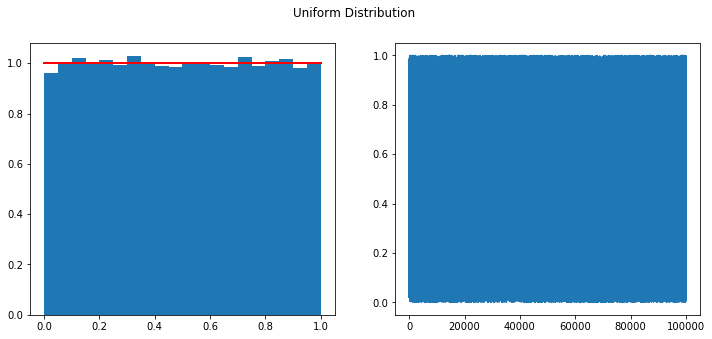

In [6]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

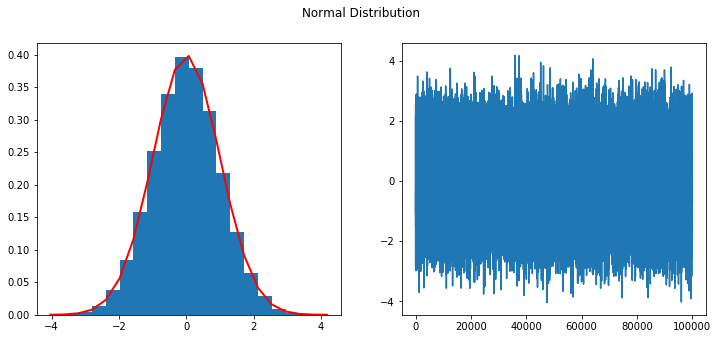

In [7]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

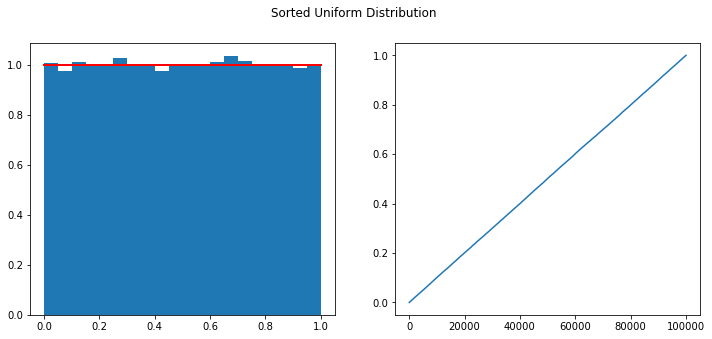

In [8]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

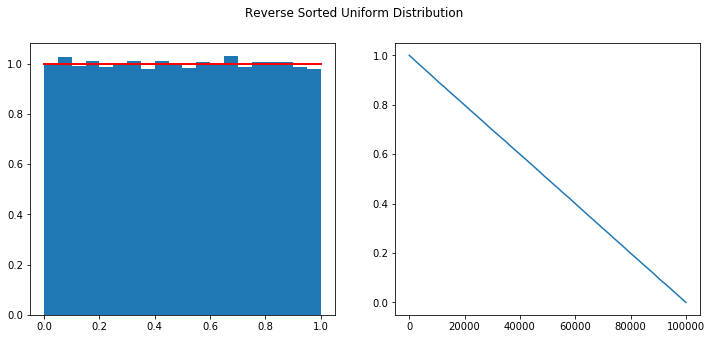

In [9]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

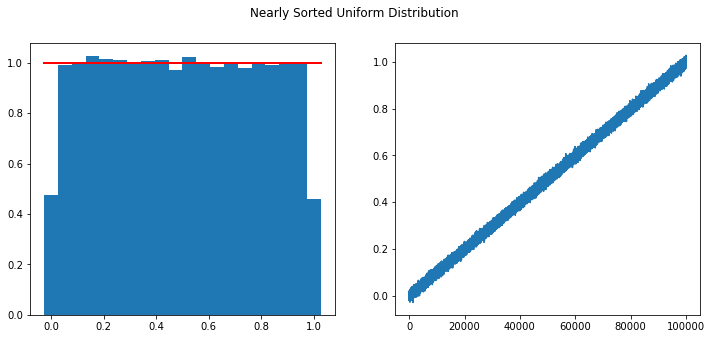

In [10]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

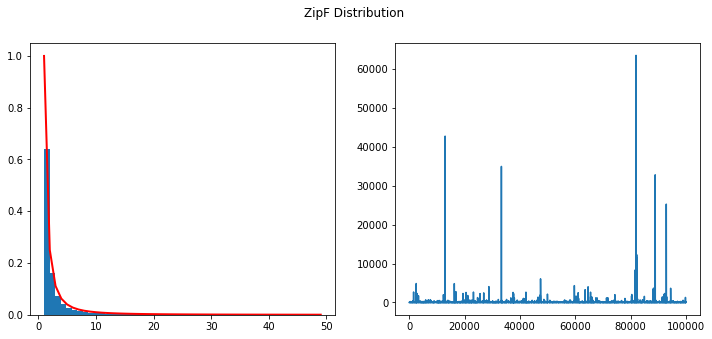

In [11]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [12]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [13]:
df_distribions = create_df_distributions()

In [14]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf,Strings,Dates,Repetetive_Numbers
0,0.449124,2.163638,0.000013,0.999999,-0.001488,1,x2z,1959-07-11 22:55:57.162972,99
1,0.076582,-0.306917,0.000045,0.999998,-0.004703,5,nsg,1875-12-10 22:55:57.162972,32
2,0.224658,-0.183659,0.000045,0.999997,0.007440,1,x6v,1799-08-23 22:55:57.162972,35
3,0.483322,-0.047649,0.000063,0.999972,0.001183,16,606,1902-08-07 22:55:57.162972,32
4,0.661546,-1.248152,0.000077,0.999971,-0.030176,1,234,1882-06-06 22:55:57.162972,37


In [64]:
def evaluate_sorts(distribution="Uniform", second_col = None, repetitions=100):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = time.process_time()
                df_distribions.sort_values([distribution],kind=sorting_algorithm)
                exeuction_time = (time.process_time() - start_time)
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", (np.mean(algorithm_times)))
            print("It has a STD of", (np.std(algorithm_times)))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = time.process_time()
                df_distribions.sort_values([distribution, second_col],kind=sorting_algorithm)
                exeuction_time = (time.process_time() - start_time)
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", (np.mean(algorithm_times)))
            print("It has a STD of", (np.std(algorithm_times)))
    return measures

In [39]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 0.06296875
It has a STD of 0.007478811214858951
The time of mergesort is 0.06296875
It has a STD of 0.008105445218339337
The time of heapsort is 0.064375
It has a STD of 0.009951052080056661


In [40]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 0.1034375
It has a STD of 0.009827615745947742
The time of mergesort is 0.10453125
It has a STD of 0.009554275466381532
The time of heapsort is 0.10640625
It has a STD of 0.01052689078918842


In [41]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 0.0453125
It has a STD of 0.006051536478449089
The time of mergesort is 0.045625
It has a STD of 0.007868548945008855
The time of heapsort is 0.045
It has a STD of 0.0077434448083524175


In [42]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 0.05390625
It has a STD of 0.008081312838116094
The time of mergesort is 0.05578125
It has a STD of 0.007735558621554102
The time of heapsort is 0.05640625
It has a STD of 0.007621092748910748


In [43]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 0.01984375
It has a STD of 0.006936866525132223
The time of mergesort is 0.02234375
It has a STD of 0.007735558621554101
The time of heapsort is 0.0246875
It has a STD of 0.007711851674533168


In [44]:
print("Dates")
df_dates = evaluate_sorts(distribution="Dates")

Dates
The time of quicksort is 0.02828125
It has a STD of 0.006515831081872826
The time of mergesort is 0.02921875
It has a STD of 0.005700448858423343
The time of heapsort is 0.03765625
It has a STD of 0.00799627598870249


In [45]:
print("Strings")
df_strings = evaluate_sorts(distribution="Strings")

Strings
The time of quicksort is 0.12703125
It has a STD of 0.009284721572965986
The time of mergesort is 0.11421875
It has a STD of 0.007556751430839842
The time of heapsort is 0.2159375
It has a STD of 0.013509978950760802


In [65]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 0.02921875
It has a STD of 0.007860788267565793
The time of mergesort is 0.03140625
It has a STD of 0.006808987052969039
The time of heapsort is 0.0365625
It has a STD of 0.007401699551454382


In [66]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 0.0296875
It has a STD of 0.007160274523368502
The time of mergesort is 0.03078125
It has a STD of 0.007144914603233548
The time of heapsort is 0.0375
It has a STD of 0.008558164961018222


In [67]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.0159375
It has a STD of 0.004931166824393594
The time of mergesort is 0.0146875
It has a STD of 0.0065625
The time of heapsort is 0.0225
It has a STD of 0.0077560460287442855


In [72]:
pd.set_option("display.precision", 15)

In [73]:
df_uniform_sorted

,quicksort,mergesort,heapsort
0,0.015625,0.015625,0.031250
1,0.015625,0.015625,0.015625
2,0.015625,0.015625,0.031250
3,0.015625,0.015625,0.015625
4,0.015625,0.000000,0.015625
...,...,...,...
95,0.015625,0.015625,0.031250
96,0.015625,0.015625,0.015625
97,0.015625,0.015625,0.015625
98,0.015625,0.015625,0.015625


In [68]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted


KeyboardInterrupt: 

In [ ]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

In [51]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 0.01875
It has a STD of 0.007328774624724109
The time of mergesort is 0.02015625
It has a STD of 0.007090032065336518
The time of heapsort is 0.020625
It has a STD of 0.007288689868556625


In [52]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Distribution')
    count, bins, ignored = ax1.hist(sort_dist, bins = 20)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)

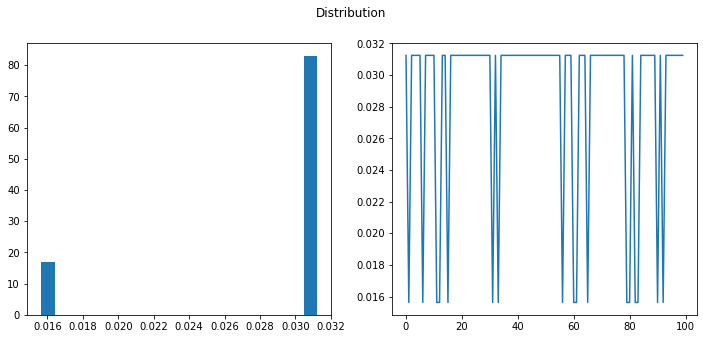

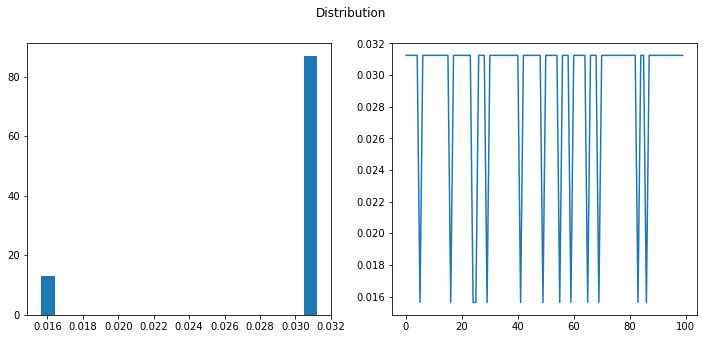

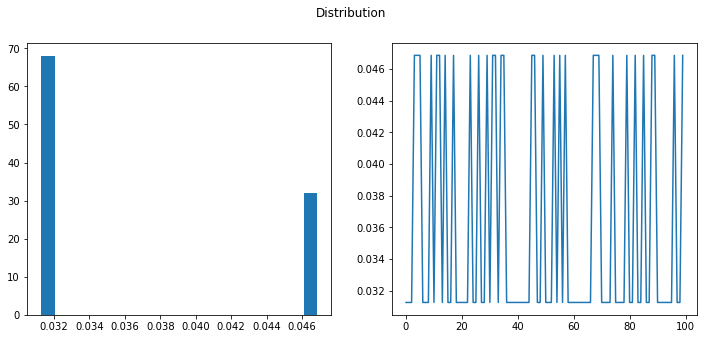

In [53]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean)

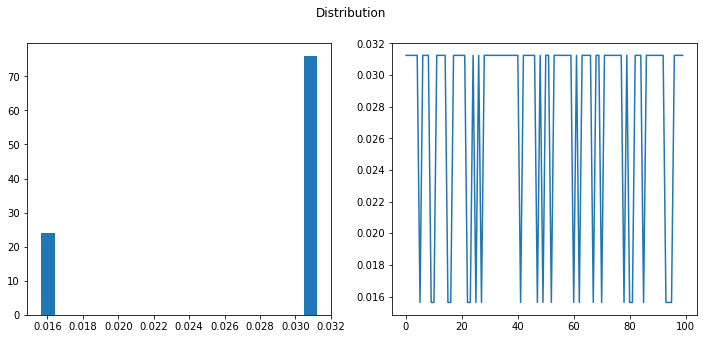

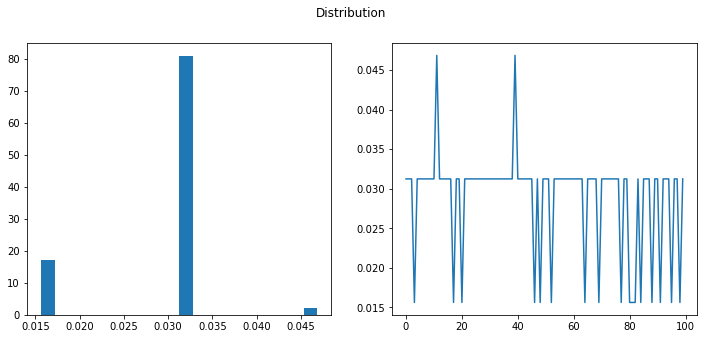

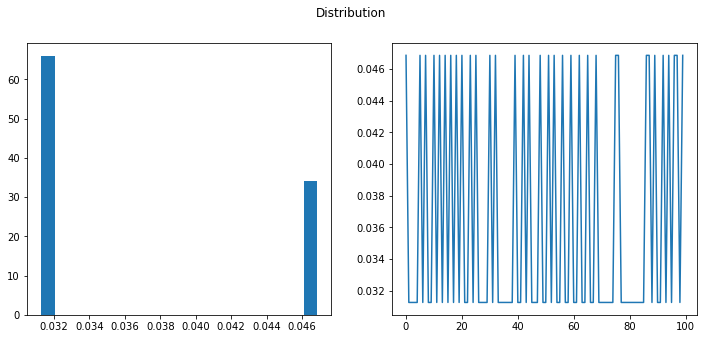

In [54]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean)

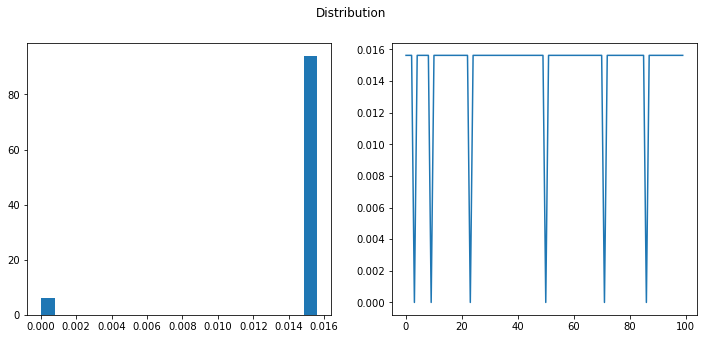

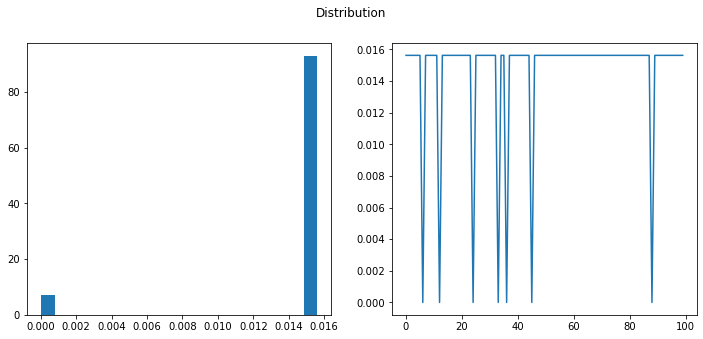

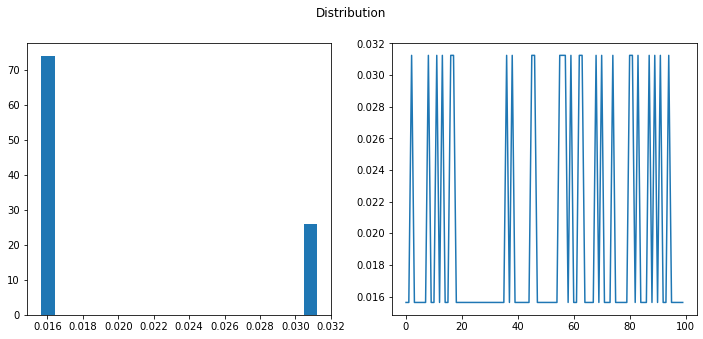

In [55]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean)

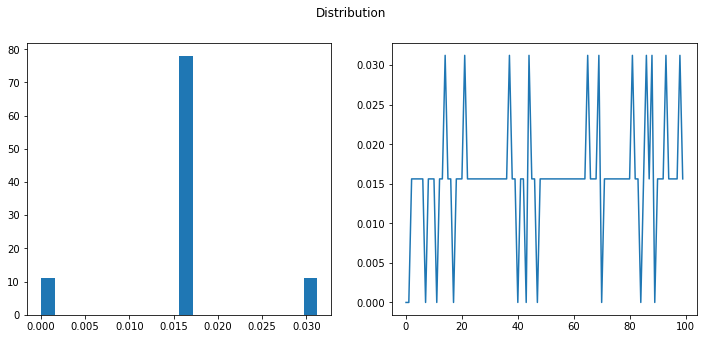

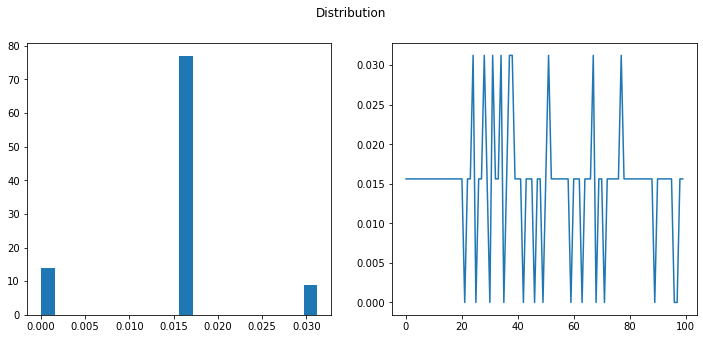

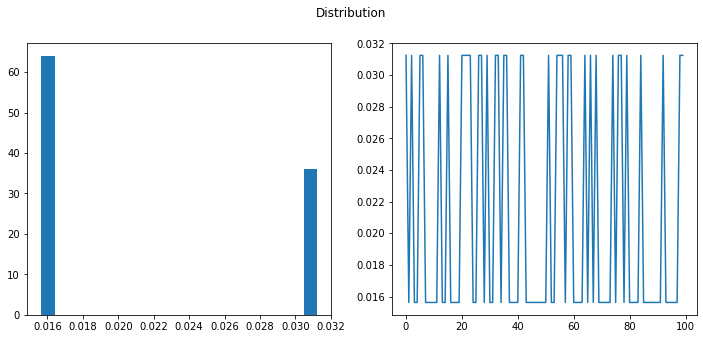

In [56]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean)

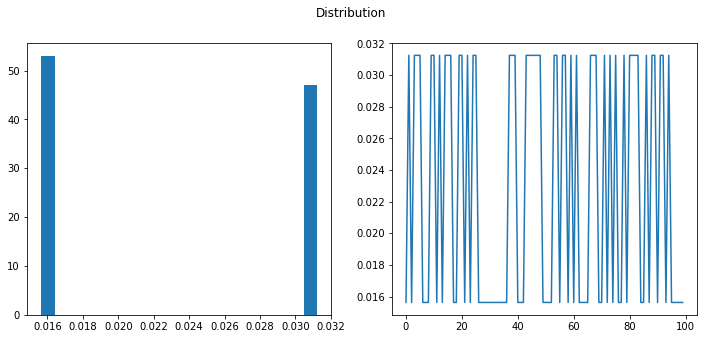

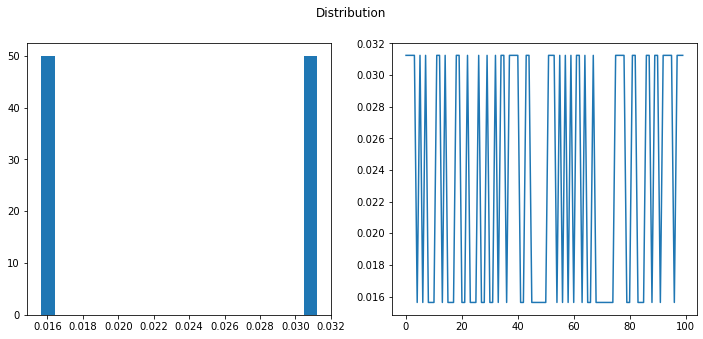

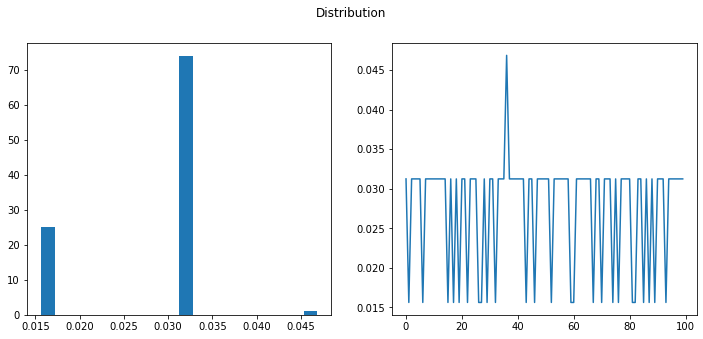

In [57]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean)

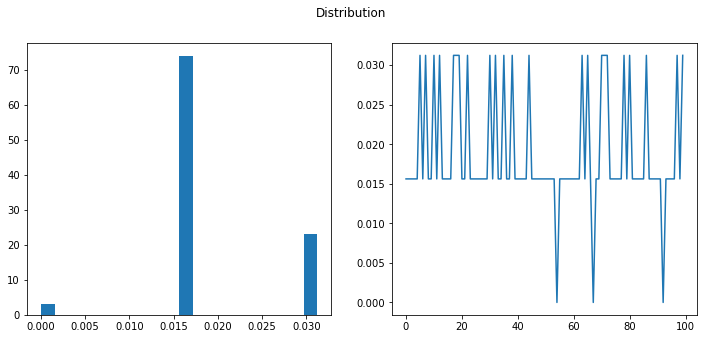

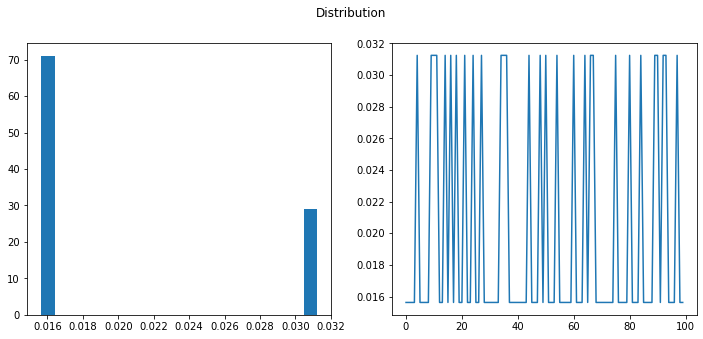

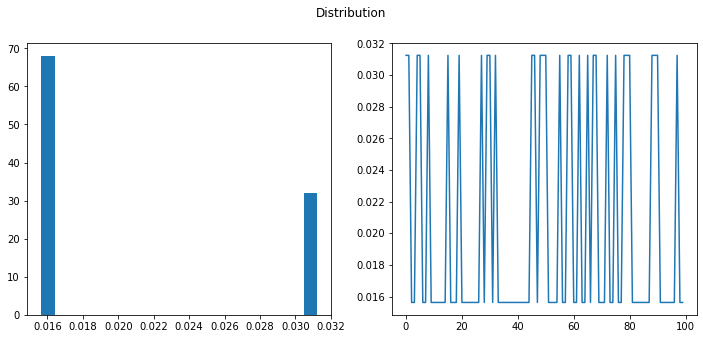

In [58]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean)

In [59]:
df

0     0.031250
1     0.031250
2     0.015625
3     0.015625
4     0.031250
        ...   
95    0.015625
96    0.015625
97    0.031250
98    0.015625
99    0.015625
Name: heapsort, Length: 100, dtype: float64

In [60]:
df[0]

0.03125